In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import pitszi

# Test the modified cutoff powerlaw model

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                           Model                            
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting SVM Ghirardini (2019) UPP.
Setting model_pressure_fluctuation value
Fixing: R500 if involved
Setting model_pressure_fluctuation value
Fixing: R500 if involved


(0.0001, 1.0)

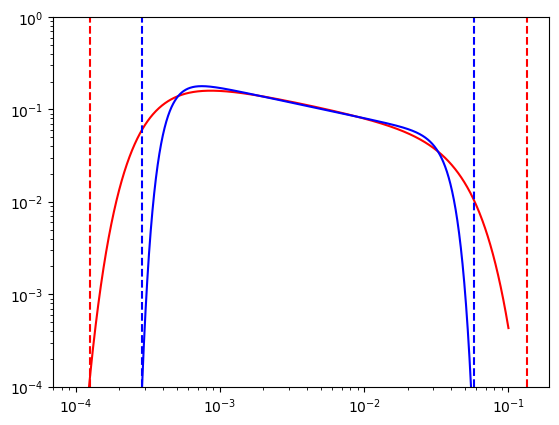

In [2]:
C = pitszi.Model()

C.model_pressure_fluctuation = {'name': 'CutoffPowerLaw','statistics': 'gaussian','Norm': 0.25,
                                'slope': -3.6666666666666665,'Linj': 2000*u.kpc,'Ldis': 30*u.kpc}
k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k.to_value('kpc-1'), (4*np.pi*k**3*pk).to_value('')**0.5, color='r')
plt.axvline(1/(C.model_pressure_fluctuation['Linj'].to_value('kpc')*(-np.log(1e-7))**(1/2)), color='r', ls='--')
plt.axvline((-np.log(1e-7))**(1/2)/C.model_pressure_fluctuation['Ldis'].to_value('kpc'), color='r', ls='--')

C.model_pressure_fluctuation = {'name': 'ModifiedCutoffPowerLaw','statistics': 'gaussian','Norm': 0.25,
                                'slope': -3.6666666666666665,'Linj': 2000*u.kpc,'Ldis': 30*u.kpc,
                                'Ninj': 5,'Ndis': 5}
k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k.to_value('kpc-1'), (4*np.pi*k**3*pk).to_value('')**0.5, color='b')
plt.axvline(1/(C.model_pressure_fluctuation['Linj'].to_value('kpc') * (-np.log(1e-7))**(1/C.model_pressure_fluctuation['Ninj'])), color='b', ls='--')
plt.axvline((-np.log(1e-7))**(1/C.model_pressure_fluctuation['Ndis'])/C.model_pressure_fluctuation['Ldis'].to_value('kpc'), color='b', ls='--')
plt.ylim(1e-4,1e0)

# Test the User binned model

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                           Model                            
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting SVM Ghirardini (2019) UPP.
                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------

(0.1, 10000000.0)

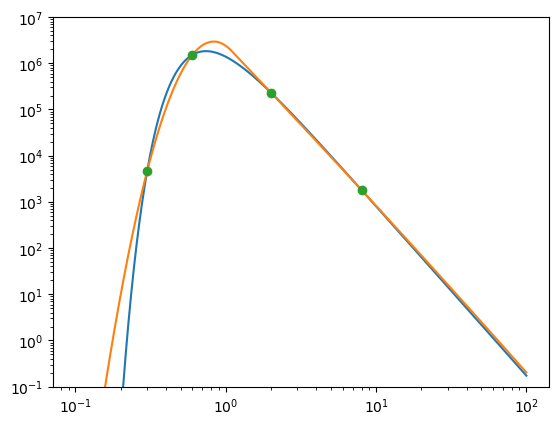

In [5]:
C1 = pitszi.Model()
C2 = pitszi.Model()
k_in, pk_in = C1.get_pressure_fluctuation_spectrum(np.array([0.3,0.6,2,8])*u.Mpc**-1)
C2.model_pressure_fluctuation = {'name': 'User', 'statistics': 'gaussian',
                                'k': k_in, 'pk': pk_in}

k1, pk1 = C1.get_pressure_fluctuation_spectrum()
k2, pk2 = C2.get_pressure_fluctuation_spectrum()
plt.loglog(k1, pk1)
plt.loglog(k2, pk2)
plt.plot(k_in, pk_in, marker='o', ls='')
plt.ylim(0.1,1e7)

----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126765614887
            Actual rms for this noise realization: 0.23114935130363795
----- INFO: pressure fluctuation cube rms.
            Expected rms given the missing k range: 0.22896758246994853
            Actual rms for this noise realization: 0.22811166897055213
Setting model_seed_fluctuation value
Setting model_seed_fluctuation value
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126765614887
            Actual rms for this noise realization: 0.23219919923038188
----- INFO: pressure fluctuation cube rms.
            Expected rms given the missing k range: 0.22896758246994853
            Actual rms for this noise realization: 0.23064428900339345
Setting model_seed_fluctuation value
Setting model_seed_fluctuation value
--

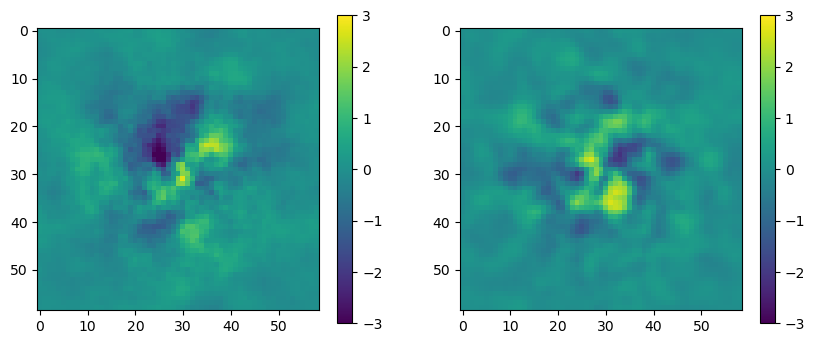

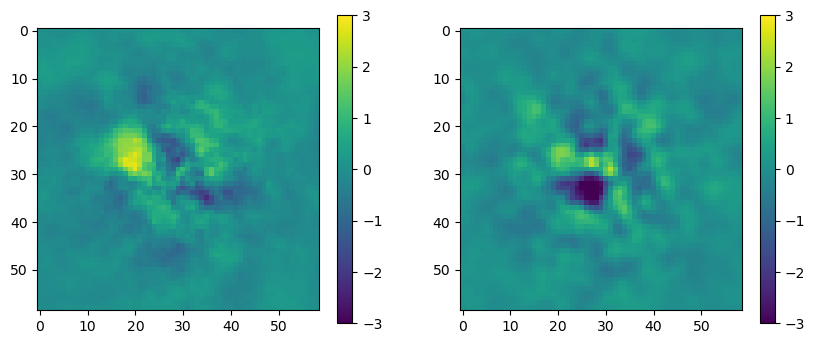

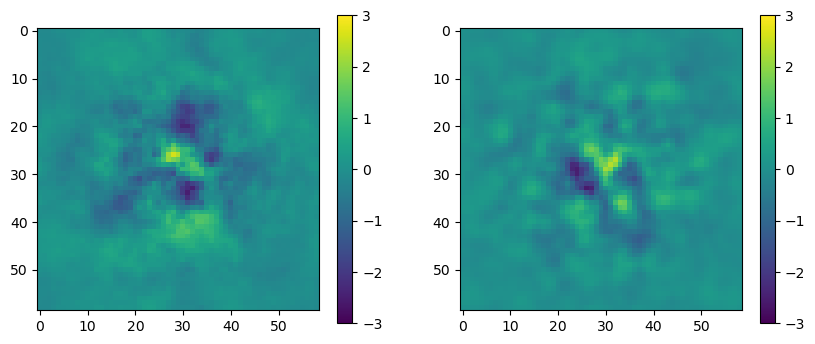

In [4]:
sz0 = C1.get_sz_map(no_fluctuations=True)

plt.figure(1, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
plt.imshow((C1.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()
ax = plt.subplot(1, 2, 2)
plt.imshow((C2.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()

C1.new_seed()
C2.new_seed()

plt.figure(2, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
plt.imshow((C1.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()
ax = plt.subplot(1, 2, 2)
plt.imshow((C2.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()

C1.new_seed()
C2.new_seed()
plt.figure(3, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
plt.imshow((C1.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()
ax = plt.subplot(1, 2, 2)
plt.imshow((C2.get_sz_map()-sz0)*1e5, vmin=-3, vmax=3)
plt.colorbar()